In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib as mpl
import shapely

In [ ]:
gj = gpd.read_file("/content/weatherdb_categories_hagel.geojson")

In [ ]:
def grid():
    # total area for the grid
    xmin, ymin, xmax, ymax= 5.8,45.5,11,48
    # how many cells across and down
    n_cells=30
    cell_size = (xmax-xmin)/n_cells
    # projection of the grid
    crs = "EPSG:4326"
    # create the cells in a loop
    grid_cells = []
    for x0 in np.arange(xmin, xmax+cell_size, cell_size ):
        for y0 in np.arange(ymin, ymax+cell_size, cell_size):
            # bounds
            x1 = x0-cell_size
            y1 = y0+cell_size
            grid_cells.append( shapely.geometry.box(x0, y0, x1, y1)  )
    return gpd.GeoDataFrame(grid_cells, columns=['geometry'],
                                 crs=crs)


In [ ]:
cumulativereports = grid()
cumulativereports = cumulativereports.join(
    gpd.sjoin(gpd.GeoDataFrame({'col1': ['dummy'], 'geometry': np.NaN}, crs="EPSG:4326"), cumulativereports).groupby("index_right").size().rename("points"),
    how="left",
    )
cumulativereports = cumulativereports.fillna(0)

In [ ]:
cumulativereports["points"]

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
507    0.0
508    0.0
509    0.0
510    0.0
511    0.0
Name: points, Length: 512, dtype: float64

In [ ]:
def count_points_in_polygons(json):
    #create grid
    df_poly = grid()

    #join grid with json to get number of points in a square
    joined = df_poly.join(
    gpd.sjoin(json, df_poly).groupby("index_right").size().rename("points"),
    how="left",
    )
    #fill NaNs with 0s
    joined = joined.fillna(0)

    #add points to cumulative reports
    cumulativereports["points"] += joined["points"]
    return joined

In [ ]:
count_points_in_polygons(gj)

,geometry,points
0,"POLYGON ((5.62667 45.50000, 5.62667 45.67333, ...",0.0
1,"POLYGON ((5.62667 45.67333, 5.62667 45.84667, ...",0.0
2,"POLYGON ((5.62667 45.84667, 5.62667 46.02000, ...",0.0
3,"POLYGON ((5.62667 46.02000, 5.62667 46.19333, ...",2.0
4,"POLYGON ((5.62667 46.19333, 5.62667 46.36667, ...",0.0
...,...,...
507,"POLYGON ((11.00000 47.40667, 11.00000 47.58000...",0.0
508,"POLYGON ((11.00000 47.58000, 11.00000 47.75333...",0.0
509,"POLYGON ((11.00000 47.75333, 11.00000 47.92667...",0.0
510,"POLYGON ((11.00000 47.92667, 11.00000 48.10000...",0.0


In [ ]:
cumulativereports

,geometry,points
0,"POLYGON ((5.62667 45.50000, 5.62667 45.67333, ...",0.0
1,"POLYGON ((5.62667 45.67333, 5.62667 45.84667, ...",0.0
2,"POLYGON ((5.62667 45.84667, 5.62667 46.02000, ...",0.0
3,"POLYGON ((5.62667 46.02000, 5.62667 46.19333, ...",4.0
4,"POLYGON ((5.62667 46.19333, 5.62667 46.36667, ...",0.0
...,...,...
507,"POLYGON ((11.00000 47.40667, 11.00000 47.58000...",0.0
508,"POLYGON ((11.00000 47.58000, 11.00000 47.75333...",0.0
509,"POLYGON ((11.00000 47.75333, 11.00000 47.92667...",0.0
510,"POLYGON ((11.00000 47.92667, 11.00000 48.10000...",0.0


<ipython-input-14-3f725db3d4b5>:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


(5.349333333333334, 11.450666666666653, 44.88883333333333, 48.43449999999998)

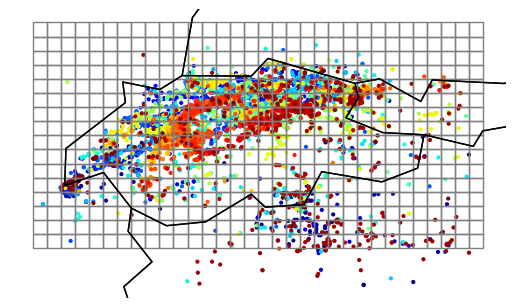

In [ ]:
coords = gj.cx[5:11,45:48]
ax = coords.plot(markersize=4, cmap='jet')
df_poly.plot(ax=ax, facecolor="none", edgecolor='grey')
plt.autoscale(False)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.to_crs(coords.crs).plot(ax=ax, color='none', edgecolor='black')
ax.axis("off")

In [ ]:
cumulativereports = grid()
cumulativereports = cumulativereports.join(
    gpd.sjoin(gpd.GeoDataFrame({'col1': ['dummy'], 'geometry': np.NaN}, crs="EPSG:4326"), cumulativereports).groupby("index_right").size().rename("points"),
    how="left",
    )
cumulativereports.fillna(0)

,geometry,points
0,"POLYGON ((5.62667 45.50000, 5.62667 45.67333, ...",0.0
1,"POLYGON ((5.62667 45.67333, 5.62667 45.84667, ...",0.0
2,"POLYGON ((5.62667 45.84667, 5.62667 46.02000, ...",0.0
3,"POLYGON ((5.62667 46.02000, 5.62667 46.19333, ...",0.0
4,"POLYGON ((5.62667 46.19333, 5.62667 46.36667, ...",0.0
...,...,...
507,"POLYGON ((11.00000 47.40667, 11.00000 47.58000...",0.0
508,"POLYGON ((11.00000 47.58000, 11.00000 47.75333...",0.0
509,"POLYGON ((11.00000 47.75333, 11.00000 47.92667...",0.0
510,"POLYGON ((11.00000 47.92667, 11.00000 48.10000...",0.0


In [ ]:
def getdata(geojson,timestart,timeend):
  #drop NaN values for timeslots
  coords = geojson.dropna(subset='timestamp')

  #select only reports made in a box containing Swizerland
  coords = coords.cx[5:11,45:48]

  #select time slot
  coords = coords[coords['timestamp'] >= timestart]
  coords = coords[coords['timestamp'] <= timeend]
  return coords

In [ ]:
def bubblecluster(json,timestart,timeend,grid,makejson = False):
  #Get Switzerland data in the selected period from the geojson
  coordinates = getdata(json,timestart,timeend)

  #merge coordinates with the grid for computing
  merged = gpd.sjoin(coordinates, grid, how='left', op='within')

  # make a simple count variable that we can sum
  merged['event']=1
  # Compute stats per grid cell -- aggregate fires to grid cells with dissolve
  dissolve = merged.dissolve(by="index_right", aggfunc="count",as_index=False)
  # put this into cell
  grid.loc[dissolve.index, 'event'] = dissolve.event.values


  #Find the convex hull of all points in each grid cell
  convex = dissolve.convex_hull
  #return centroids of each grid cell paired with the number of points in it
  dataframe = gpd.GeoDataFrame(dissolve.event.values,geometry=convex.centroid)
  dataframe = dataframe.rename(columns={0: "Event amount"})

  #with this being True, it instead returns the data in json format
  if makejson == True:
    return dataframe.to_json()
  return dataframe

<Axes: >

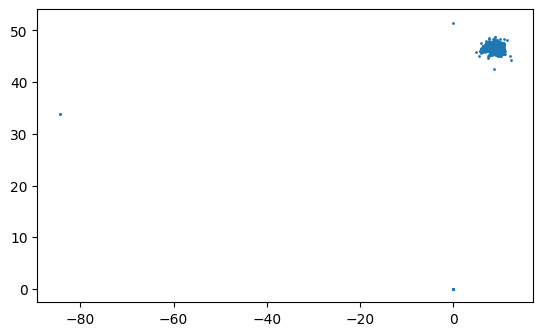

In [ ]:
gj.plot(markersize=1)

In [ ]:
gj

,fid,meldungId,crowdDeviceId,place,timestamp,submissionTimestamp,category,auspraegung,zusatzAttribute,comment,...,qualityCheckPassed,missingValidationData,qualityCheckMsg,timesReportedForImage,timesReportedForWeather,userType,sourceVersion,source,imageLabels,geometry
0,1,196314,f047ad4b-16c4-4bfe-9864-6c70ac1b0992,Waldkirch,1623354665000,1654011346865,HAGEL,HAGEL_UNTER_1CM,,None,...,False,False,meldung timestamp is outside the supported ran...,0,0,NORMAL,android-2.15,MeteoSwissApp,"{'labels': [{'name': 'Nature', 'confidence': 9...",POINT (9.29500 47.47000)
1,2,181000,F11F5502-31FD-4899-A4C2-26411659069A,Schwarzenburg,1624460400000,1653077437581,HAGEL,HAGEL_5CM,,"Alte Erfassung, da App bisher nicht bekannt. D...",...,False,False,meldung timestamp is outside the supported ran...,0,0,NORMAL,ios-2.15,MeteoSwissApp,None,POINT (7.34000 46.82000)
2,3,149243,f980f506-e2be-4891-9889-38e7e492e6f7,La Russille,1629428400000,1649431486226,HAGEL,HAGEL_UEBER_7CM,"HAGEL_GESCHLOSSENE_HAGELDECKE,HAGEL_SCHADEN_ZE...",,...,False,False,meldung timestamp is outside the supported ran...,0,0,NORMAL,android-2.15,MeteoSwissApp,None,POINT (6.48000 46.73500)
3,4,185330,3E787EAD-5F2D-4629-8438-5A7998CCC784,Walzenhausen,1635061870000,1653307483683,HAGEL,HAGEL_1CM,,None,...,False,False,image contains humans\nmeldung timestamp is ou...,0,0,NORMAL,ios-2.15,MeteoSwissApp,"{'labels': [{'name': 'Nature', 'confidence': 9...",POINT (9.60500 47.44500)
4,5,155480,B1F29933-FEFE-414C-95F5-B58D81B61B02,Adligenswil,1635684099193,1650500479226,HAGEL,HAGEL_2CM,HAGEL_SCHADEN_ZERSTOERERISCH,None,...,False,False,image contains humans\nmeldung timestamp is ou...,0,0,NORMAL,ios-2.15,MeteoSwissApp,"{'labels': [{'name': 'Face', 'confidence': 99....",POINT (8.36500 47.07000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12651,12652,197619,4A91CC8B-5509-4363-9283-4DA1A7341A9A,Wangs,1654185140914,1654185161802,HAGEL,HAGEL_2CM,,None,...,False,True,image contains humans\nvalidation with weather...,0,0,NORMAL,ios-2.15,MeteoSwissApp,"{'labels': [{'name': 'Nature', 'confidence': 9...",POINT (9.43500 47.03500)
12652,12653,197627,F57A6F9F-6C1B-4909-925D-9029BCDE25A9,Belp,1654186534680,1654186576040,HAGEL,HAGEL_UNTER_1CM,,None,...,False,False,validation with weather data [DBImage{type=RAD...,0,0,NORMAL,ios-2.15,MeteoSwissApp,None,POINT (7.50000 46.89000)
12653,12654,197608,CAB2C051-1B09-4484-8462-4694576E7A84,Gonten,1654183909643,1654183918812,HAGEL,HAGEL_UNTER_1CM,,None,...,False,False,validation with weather data [DBImage{type=RAD...,0,0,NORMAL,ios-2.15,MeteoSwissApp,None,POINT (9.34500 47.33000)
12654,12655,197611,998197E0-D8DE-48A0-851B-99864AC92947,Konstanz,1654184438552,1654184442845,HAGEL,HAGEL_UEBER_7CM,,None,...,False,False,validation with weather data [DBImage{type=RAD...,0,0,NORMAL,ios-2.15,MeteoSwissApp,None,POINT (9.17500 47.66000)


In [ ]:
coords = getdata(gj,1628348380523,1654186720801)

In [ ]:
coords

,fid,meldungId,crowdDeviceId,place,timestamp,submissionTimestamp,category,auspraegung,zusatzAttribute,comment,...,qualityCheckPassed,missingValidationData,qualityCheckMsg,timesReportedForImage,timesReportedForWeather,userType,sourceVersion,source,imageLabels,geometry
2,3,149243,f980f506-e2be-4891-9889-38e7e492e6f7,La Russille,1629428400000,1649431486226,HAGEL,HAGEL_UEBER_7CM,"HAGEL_GESCHLOSSENE_HAGELDECKE,HAGEL_SCHADEN_ZE...",,...,False,False,meldung timestamp is outside the supported ran...,0,0,NORMAL,android-2.15,MeteoSwissApp,None,POINT (6.48000 46.73500)
3,4,185330,3E787EAD-5F2D-4629-8438-5A7998CCC784,Walzenhausen,1635061870000,1653307483683,HAGEL,HAGEL_1CM,,None,...,False,False,image contains humans\nmeldung timestamp is ou...,0,0,NORMAL,ios-2.15,MeteoSwissApp,"{'labels': [{'name': 'Nature', 'confidence': 9...",POINT (9.60500 47.44500)
4,5,155480,B1F29933-FEFE-414C-95F5-B58D81B61B02,Adligenswil,1635684099193,1650500479226,HAGEL,HAGEL_2CM,HAGEL_SCHADEN_ZERSTOERERISCH,None,...,False,False,image contains humans\nmeldung timestamp is ou...,0,0,NORMAL,ios-2.15,MeteoSwissApp,"{'labels': [{'name': 'Face', 'confidence': 99....",POINT (8.36500 47.07000)
5,6,194842,8FB3BC36-3695-42D5-A4D0-C8C6CCA33283,Genf,1636872960000,1653803841785,HAGEL,HAGEL_UEBER_7CM,"HAGEL_GESCHLOSSENE_HAGELDECKE,HAGEL_SCHADEN_ZE...",None,...,False,False,user temporarily blocked based on short term t...,0,0,NORMAL,ios-2.15,MeteoSwissApp,None,POINT (6.14500 46.21000)
6,7,143142,1A1F5BA5-07F4-40CA-BAAD-DAE0E17205B9,Naturns,1644407303363,1648818518136,HAGEL,HAGEL_3CM,,None,...,False,False,image contains humans\nmeldung timestamp is ou...,0,0,NORMAL,ios-2.15,MeteoSwissApp,"{'labels': [{'name': 'Nature', 'confidence': 9...",POINT (10.99500 46.65000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12650,12651,197622,44379F2E-29EE-4DF6-B307-DA6FCBF2FD73,Wangs,1654185214215,1654185224981,HAGEL,HAGEL_1CM,,None,...,False,False,validation with weather data [DBImage{type=RAD...,0,0,NORMAL,ios-2.15,MeteoSwissApp,None,POINT (9.43500 47.03500)
12651,12652,197619,4A91CC8B-5509-4363-9283-4DA1A7341A9A,Wangs,1654185140914,1654185161802,HAGEL,HAGEL_2CM,,None,...,False,True,image contains humans\nvalidation with weather...,0,0,NORMAL,ios-2.15,MeteoSwissApp,"{'labels': [{'name': 'Nature', 'confidence': 9...",POINT (9.43500 47.03500)
12652,12653,197627,F57A6F9F-6C1B-4909-925D-9029BCDE25A9,Belp,1654186534680,1654186576040,HAGEL,HAGEL_UNTER_1CM,,None,...,False,False,validation with weather data [DBImage{type=RAD...,0,0,NORMAL,ios-2.15,MeteoSwissApp,None,POINT (7.50000 46.89000)
12653,12654,197608,CAB2C051-1B09-4484-8462-4694576E7A84,Gonten,1654183909643,1654183918812,HAGEL,HAGEL_UNTER_1CM,,None,...,False,False,validation with weather data [DBImage{type=RAD...,0,0,NORMAL,ios-2.15,MeteoSwissApp,None,POINT (9.34500 47.33000)


<Axes: >

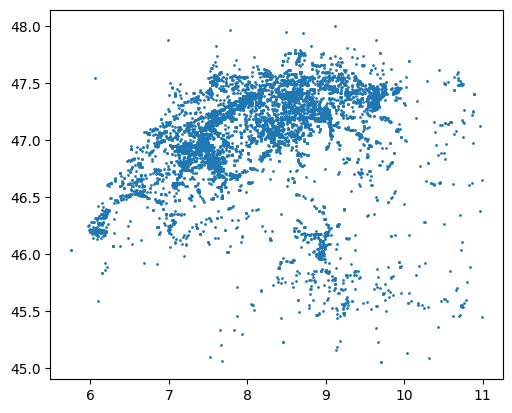

In [ ]:
coords.plot(markersize=1)

<ipython-input-12-ba6e435d4fef>:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


<Axes: >

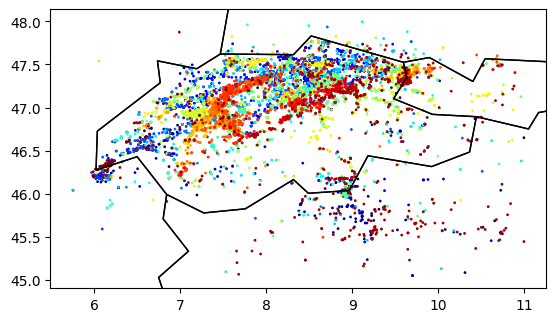

In [ ]:
ax = coords.plot(markersize=1, cmap='jet')
plt.autoscale(False)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.to_crs(coords.crs).plot(ax=ax, color='none', edgecolor='black')

In [ ]:
# total area for the grid
xmin, ymin, xmax, ymax= coords.total_bounds
# how many cells across and down
n_cells=30
cell_size = (xmax-xmin)/n_cells
# projection of the grid
crs = "EPSG:4326"
# create the cells in a loop
grid_cells = []
for x0 in np.arange(xmin, xmax+cell_size, cell_size ):
    for y0 in np.arange(ymin, ymax+cell_size, cell_size):
        # bounds
        x1 = x0-cell_size
        y1 = y0+cell_size
        grid_cells.append( shapely.geometry.box(x0, y0, x1, y1)  )
cell = gpd.GeoDataFrame(grid_cells, columns=['geometry'],
                                 crs=crs)

<ipython-input-14-53290c8fd1da>:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


(5.300866666666666, 11.449133333333343, 44.892799999999994, 48.351200000000006)

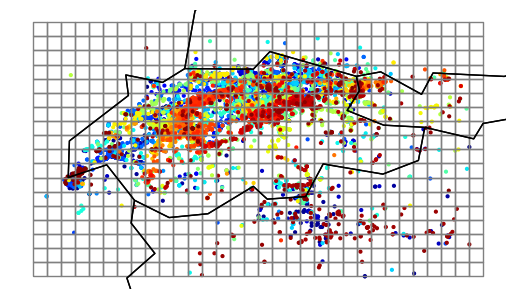

In [ ]:
ax = coords.plot(markersize=4, cmap='jet')
cell.plot(ax=ax, facecolor="none", edgecolor='grey')
plt.autoscale(False)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.to_crs(coords.crs).plot(ax=ax, color='none', edgecolor='black')
ax.axis("off")

In [ ]:
merged = gpd.sjoin(coords, cell, how='left', op='within')

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


In [ ]:
# make a simple count variable that we can sum
merged['event']=1
# Compute stats per grid cell -- aggregate fires to grid cells with dissolve
dissolve = merged.dissolve(by="index_right", aggfunc="count",as_index=False)
# put this into cell
cell.loc[dissolve.index, 'event'] = dissolve.event.values

In [ ]:
convex = dissolve.convex_hull

In [ ]:
centroid = convex.centroid

<ipython-input-18-5129eeb7029c>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = convex.centroid


<ipython-input-19-545ada39dc1b>:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


(5.799176485655738, 11.242420167349726, 44.918499999999995, 48.1415)

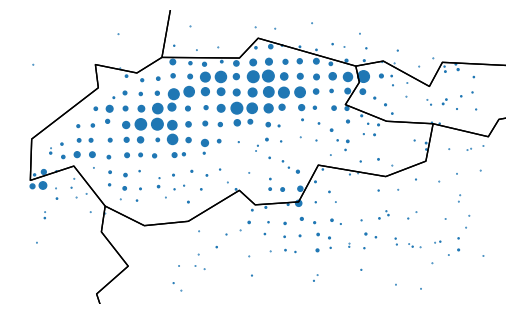

In [ ]:
ax = centroid.plot(markersize=np.minimum(dissolve.event.values/5, [70]*len(dissolve)))
#centroid.plot(ax=ax, facecolor="none", edgecolor='grey')
plt.autoscale(False)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.to_crs(merged.crs).plot(ax=ax, color='none', edgecolor='black')
ax.axis("off")

In [ ]:
bubblecluster(gj,1628348380523,1654186720801,cell,makejson = False)

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)
<ipython-input-27-c7aff56e4797>:19: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dataframe = gpd.GeoDataFrame(dissolve.event.values,geometry=convex.centroid)


,Event amount,geometry
0,1,POINT (6.09500 45.59000)
1,59,POINT (6.04660 46.20783)
2,11,POINT (6.06932 46.33341)
3,1,POINT (6.05500 47.54000)
4,4,POINT (6.18167 45.86000)
...,...,...
298,1,POINT (10.86000 46.62000)
299,1,POINT (10.99500 46.65000)
300,2,POINT (10.91500 47.05000)
301,3,POINT (10.87500 47.23667)


<ipython-input-22-a545384d5d15>:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


(5.431866666666666, 8.698133333333338, 44.892799999999994, 48.351200000000006)

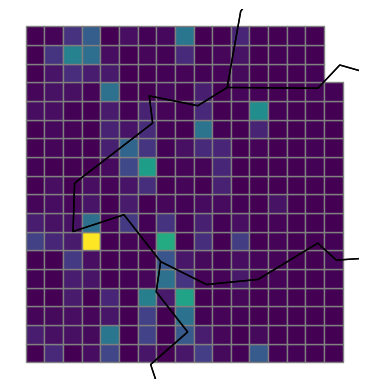

In [ ]:
ax = cell.plot(column='event', cmap='viridis',  edgecolor="grey")
plt.autoscale(False)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.to_crs(merged.crs).plot(ax=ax, color='none', edgecolor='black')
ax.axis('off')